In [1]:
import numpy as np

from scipy.optimize import curve_fit
import scipy.ndimage as ndimage
from scipy.io import loadmat
from ImageProcessing import *

import matplotlib.pyplot as plt
import matplotlib.scale as scale

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

from ImageProcessing import *
from ImageGenerator import ImageGenerator
from ImageClassifier import *

# Loading Data

In [2]:
data = loadmat('jun1_run9.mat')
n_loops = 20
lattice_shape = np.array([10, 10])
stack = data['stack']

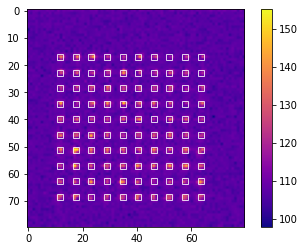

In [3]:
processor = GreenImageProcessor(stack, lattice_shape, 20)
processor.plot()

# Creating Labels with Thresholding Algorithm

In [4]:
crops, labels = processor.make_dataset(1)

[[         nan          inf]
 [         nan          inf]
 [         nan          inf]
 [         nan          inf]
 [         nan          inf]
 [         nan          inf]
 [         nan          inf]
 [         nan          inf]
 [         nan          inf]
 [         nan          inf]
 [116.35472715 104.67334407]
 [         nan          inf]
 [116.52316647 109.36285894]
 [109.27443631 104.4471831 ]
 [115.49841843 104.37542352]
 [115.59517256 109.0689317 ]
 [115.54093439 104.7548406 ]
 [115.23855154 104.52645531]
 [114.09255488 108.85484027]
 [         nan          inf]
 [115.99321649 104.83830066]
 [117.20016419 103.77806573]
 [111.0969936  109.54755915]
 [116.0724813  104.88032548]
 [109.89359906 104.29559994]
 [116.38132521 104.91246419]
 [115.73070863 109.64420448]
 [115.1061506  104.74229957]
 [115.33707021 109.1075897 ]
 [         nan          inf]
 [116.25987539 104.51929291]
 [116.82380001 109.09002399]
 [111.84692846 109.20817739]
 [116.37745192 104.86424355]
 [111.13311565

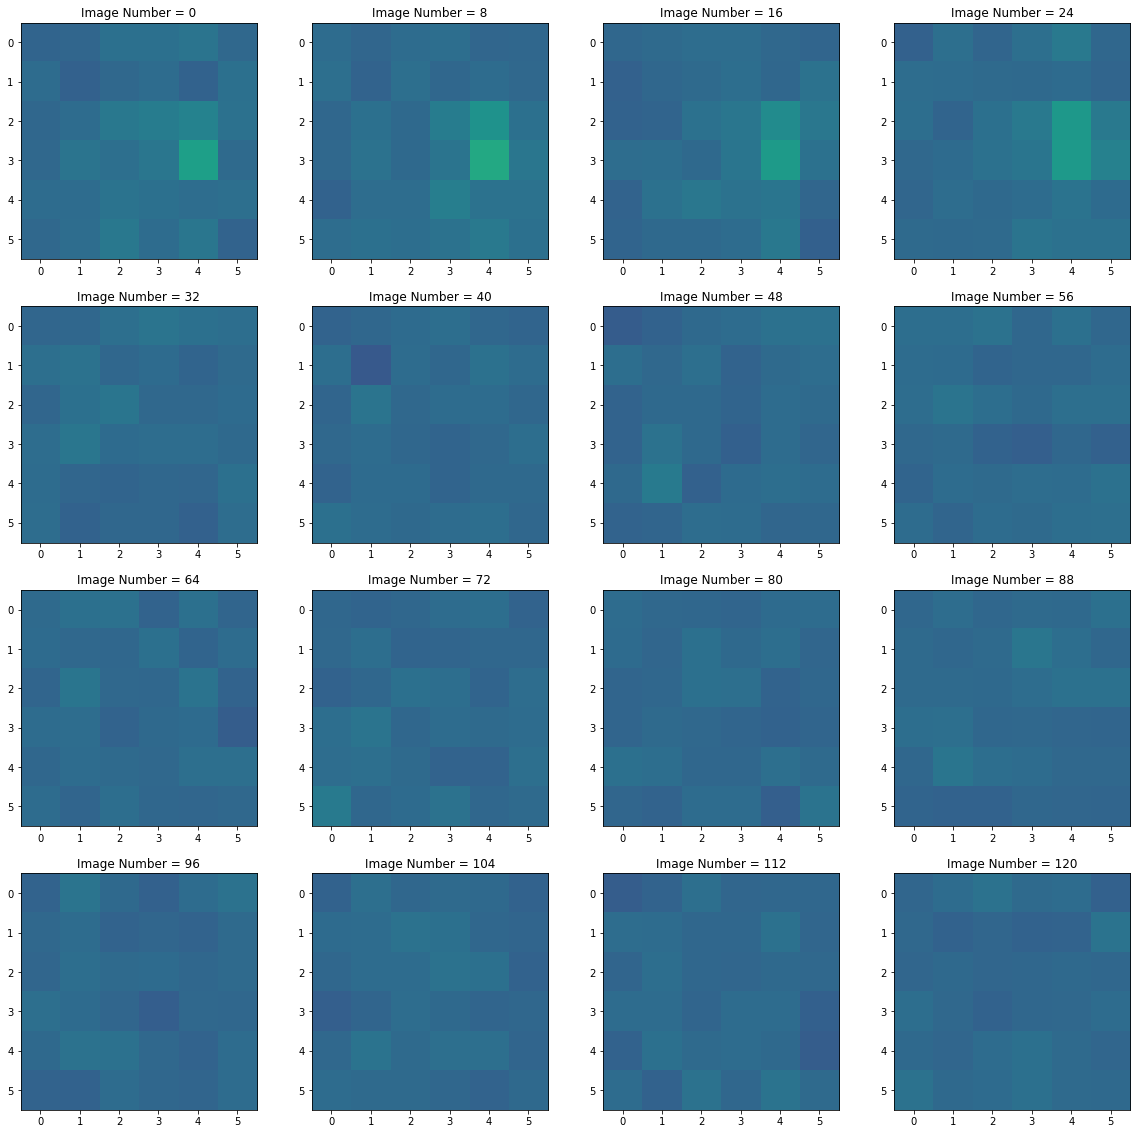

In [5]:
#i, j, k = np.random.randint(processor.n_tweezers), np.random.randint(processor.n_loops), np.random.randint(processor.per_loop - 4)

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for n in range(16):
    axs[n // 4, np.mod(n, 4)].imshow(crops[processor.crop_index(12, 19, 8 * n)], vmin=processor.stack.min(), vmax=processor.stack.max())
    axs[n // 4, np.mod(n, 4)].set_title(f"Image Number = {8 * n}")

(array([  4.,   6.,  25.,  71., 155., 239., 318., 356., 235., 180.,  95.,
         24.,  13.,  18.,  22.,  58., 112., 109., 167., 143., 133.,  93.,
         62.,  46.,  23.,   8.,   3.,   0.,   1.,   1.]),
 array([103.13888889, 103.71296296, 104.28703704, 104.86111111,
        105.43518519, 106.00925926, 106.58333333, 107.15740741,
        107.73148148, 108.30555556, 108.87962963, 109.4537037 ,
        110.02777778, 110.60185185, 111.17592593, 111.75      ,
        112.32407407, 112.89814815, 113.47222222, 114.0462963 ,
        114.62037037, 115.19444444, 115.76851852, 116.34259259,
        116.91666667, 117.49074074, 118.06481481, 118.63888889,
        119.21296296, 119.78703704, 120.36111111]),
 <BarContainer object of 30 artists>)

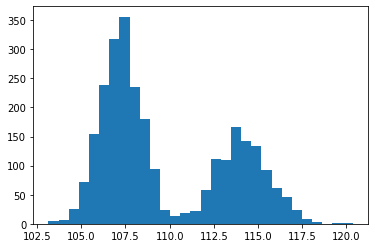

In [6]:
tweezer = 10
plt.hist(np.mean(crops[processor.crop_index(tweezer, 0, 0): processor.crop_index(tweezer + 1, 0, 0)], axis=(1, 2)), bins=30)

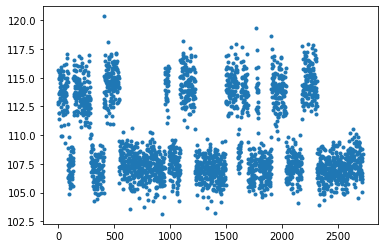

In [7]:
plt.plot(np.mean(crops[processor.crop_index(tweezer, 0, 0): processor.crop_index(tweezer + 1, 0, 0)], axis=(1, 2)), '.')

In [8]:
tweezer = 12
tweezer_vals = np.mean(crops[processor.crop_index(tweezer, 0, 0): processor.crop_index(tweezer + 1, 0, 0)], axis=(1, 2))
tweezer_labels = labels[processor.crop_index(tweezer, 0, 0): processor.crop_index(tweezer + 1, 0, 0)]

bright_mask = tweezer_labels == 1
dark_mask = tweezer_labels == 0
unknown_mask = np.isnan(tweezer_labels)

bright_indices = np.where(bright_mask)[0]
bright_vals = tweezer_vals[bright_mask]

dark_indices = np.where(dark_mask)[0]
dark_vals = tweezer_vals[dark_mask]

unknown_indices = np.where(unknown_mask)[0]
unknown_vals = tweezer_vals[unknown_mask]


0


NameError: name 'upper_threshold' is not defined

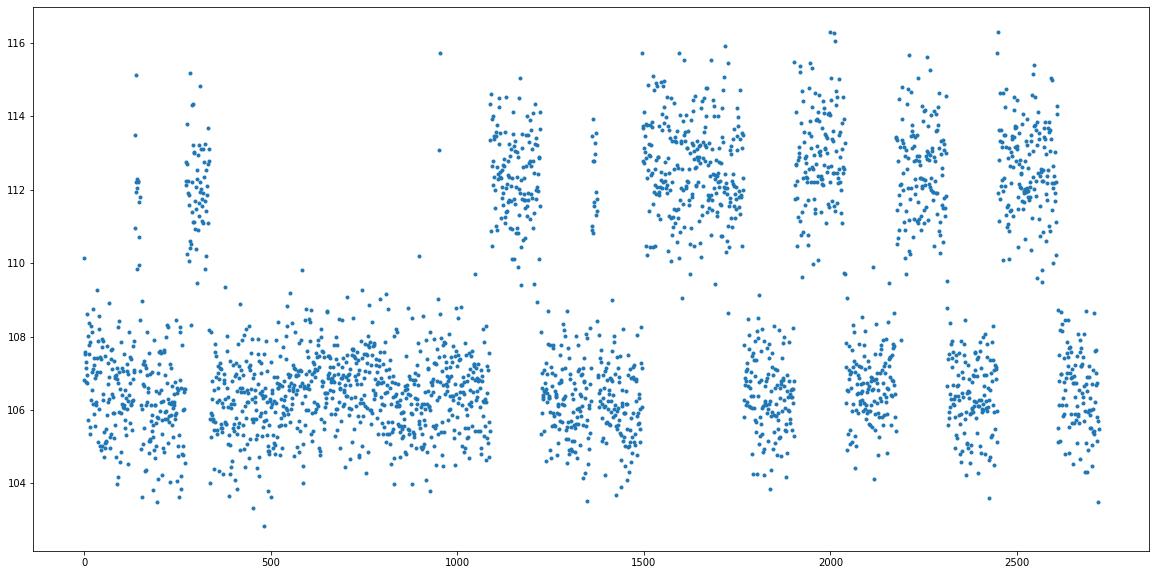

In [9]:
print(len(unknown_vals))
plt.figure(figsize=(20, 10))
plt.plot(bright_indices, bright_vals, '.', label='bright')
plt.plot(dark_indices, dark_vals, '.', label='dark')
plt.plot(unknown_indices, unknown_vals, 'o', label='?')
plt.axhline(upper_threshold, color='r', linestyle='--', label=f"Upper Threshold = {upper_threshold}")
plt.axhline(lower_threshold, color='g', linestyle='--', label=f"Lower Threshold = {lower_threshold}")
plt.legend()
plt.title(f"Tweezer Number = {tweezer}")
for i in range(n_loops):
    plt.axvline(i * processor.per_loop, color='k', linestyle='--')

In [ ]:
loop_num = 19
low = processor.per_loop * loop_num
high = processor.per_loop * (loop_num + 1)
bright_mask = (low < bright_indices) & (bright_indices < high)
dark_mask = (low < dark_indices) & (dark_indices < high)
unknown_mask = (low < unknown_indices) & (unknown_indices < high)

plt.plot(bright_indices[bright_mask], bright_vals[bright_mask], '.', label='bright')
plt.plot(dark_indices[dark_mask], dark_vals[dark_mask], '.', label='dark')
plt.plot(unknown_indices[unknown_mask], unknown_vals[unknown_mask], 'o', label='?')
plt.axhline(upper_threshold, color='r', linestyle='--')
plt.axhline(lower_threshold, color='r', linestyle='--')
plt.legend()
plt.show()

NameError: name 'bright_indices' is not defined

# Making a Neural Network For Training

In [ ]:
images, labels = processor.make_dataset()


0
[1. 1. 1.] [inf, inf, inf]
1
[1. 1. 1.] [inf, inf, inf]
2
[1. 1. 1.] [inf, inf, inf]
3
[1. 1. 1.] [inf, inf, inf]
4
[1. 1. 1.] [inf, inf, inf]
5
[1. 1. 1.] [inf, inf, inf]
6
[1. 1. 1.] [inf, inf, inf]
7
[1. 1. 1.] [inf, inf, inf]
8
[1. 1. 1.] [inf, inf, inf]
9
[1. 1. 1.] [inf, inf, inf]
10
13
[106.79944885   1.06751    269.98311864] [113.48891573   1.43228487 162.23107948]
11
[1. 1. 1.] [inf, inf, inf]
12
13
[107.08386991   1.14295949 365.28008565] [113.75538006   1.38756615 106.9878902 ]
13
14
[106.61253859   1.08666921 311.97120134] [111.89257056   1.39173435 104.81966733]
14
12
[106.45247949   1.04187365 295.22107606] [112.77977292   1.37250877 166.79862036]
15
16
[106.9105018    1.09366641 332.09536498] [112.92358379   1.2687145  118.38325614]
16
14
[107.14280531   1.19945664 347.74672379] [112.85638816   1.37380924  78.83856945]
17
14
[107.09710114   1.30139654 264.66539003] [112.31292648   1.52754352 109.73317307]
18
13
[106.63102054   1.15760946 295.58082483] [111.27885669   1

In [ ]:
i = np.where(labels == 1)[0][0]
print(labels[i])
plt.imshow(images[i])
plt.plot()

NameError: name 'labels' is not defined

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(images.shape[1], images.shape[2], 1)))
model.add(layers.Conv2D(10, (3, 3), strides=1, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Conv2D(8, (3, 3), strides=1, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

NameError: name 'images' is not defined

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
#classifier = ImageClassifier(model)
#model.fit(images, labels, epochs=5)

# TODO
* Fine tune the thresholds for labeling 
* Automate testing and training for different hyperparameters
* Make multiple models to compare against each other
* Play around with individual site thresholds